In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from tqdm import tqdm 

In [2]:
J = -1

In [3]:
# Definiendo el array inicial

def random_spin_field(N,M):
    return np.random.choice([-1,1], size=(N,M))

In [4]:
N = 10
M = 10
sigma = random_spin_field(N,M)
print(sigma)

[[ 1  1 -1  1 -1 -1  1 -1 -1  1]
 [-1 -1 -1  1  1  1  1  1  1 -1]
 [ 1 -1  1  1 -1  1  1 -1  1  1]
 [ 1  1  1  1 -1  1 -1  1 -1 -1]
 [ 1 -1  1  1  1  1 -1 -1 -1 -1]
 [ 1  1 -1 -1 -1 -1  1 -1  1  1]
 [-1 -1 -1 -1 -1  1 -1  1 -1 -1]
 [ 1  1  1  1 -1  1 -1  1  1  1]
 [-1 -1 -1  1  1 -1  1 -1 -1 -1]
 [ 1 -1 -1 -1 -1 -1 -1  1  1 -1]]


In [5]:
def GetEnergy(sigma, B):
    
    n = sigma.shape[0]
    m = sigma.shape[1]
    
    energy = 0.
     
    for i in range(n):
        for j in range(m):
            
            right = i+1
            if i == n-1:
                right = 0
                
            left = i-1
           
            up = j+1
            if j == m-1:
                up = 0
                
            down = j-1
            
            energy += 0.5*J*sigma[i,j]*\
            (sigma[right,j]+sigma[left,j]+sigma[i,up]+sigma[i,down])
            
            # Magnetic Field
            energy -= 0.5*B*sigma[i,j]
    
    return energy

In [6]:
def GetMagnetization(sigma):
    return np.sum(sigma.ravel())/float(M*N)

In [7]:
print(GetEnergy(sigma,0), GetMagnetization(sigma))

(12.0, 0.0)


In [8]:
# Implementamos metropolis

def _ising_step(sigma, T, B):
    
    beta = 1./T
    
    current = sigma.copy()
    energy1 = GetEnergy(current, B)
    
    # Calcular una posición en el array
    x = randint(0,sigma.shape[0]-1)
    y = randint(0,sigma.shape[1]-1)
    
    future = current.copy()
    future[x,y] = current[x,y]*(-1)
    
    energy2 = GetEnergy(future, B)
    
    dE = energy2-energy1
    
    r =  np.random.rand()   
    
    if dE < 0.:
        return future
        
    elif r < np.exp(- dE * beta):
        return future
    
    else:
        return current

In [9]:
Energy = []
Energy2 = []
Magnetization = []

T = 2.0
B = 0.
Ntoys = 20000

sigma_ = sigma.copy()

for i in tqdm(range(Ntoys)):
    sigma_ = _ising_step(sigma_,T,B)
    
    if i >= 5000:
        energy = GetEnergy(sigma_,B)
        magnetization = GetMagnetization(sigma_)
        
        Energy.append(energy)
        Energy2.append(energy**2)
        Magnetization.append(magnetization)

100%|██████████| 20000/20000 [00:10<00:00, 1846.63it/s]


In [10]:
e = np.average(Energy)
e2 = np.average(Energy2)
m = np.average(Magnetization)

cv = (e2 - e**2)/(T**2)

print(e/float(M*N),m,cv/float(M*N))

(-1.71284, 0.8845026666666668, 0.9522463599999992)


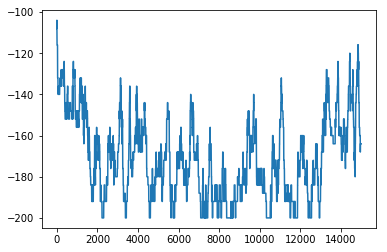

In [11]:
plt.figure()
plt.plot(Energy)

(array([3394., 2093., 2852., 1855., 1605., 1928.,  700.,  502.,   63.,
           8.]),
 array([-200. , -190.4, -180.8, -171.2, -161.6, -152. , -142.4, -132.8,
        -123.2, -113.6, -104. ]),
 <a list of 10 Patch objects>)

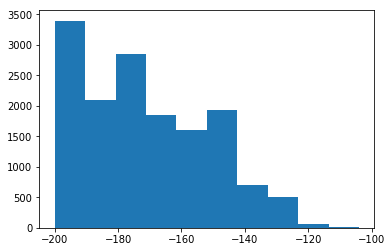

In [12]:
plt.figure()
plt.hist(Energy, bins=10)

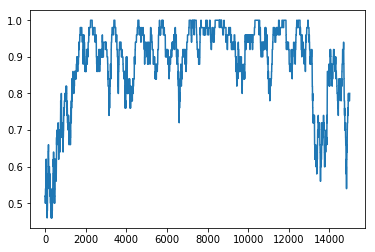

In [13]:
plt.figure()
plt.plot(Magnetization)

(array([ 129.,  198.,  422.,  302.,  806.,  616.,  770., 2455., 4169.,
        5133.]),
 array([0.46 , 0.514, 0.568, 0.622, 0.676, 0.73 , 0.784, 0.838, 0.892,
        0.946, 1.   ]),
 <a list of 10 Patch objects>)

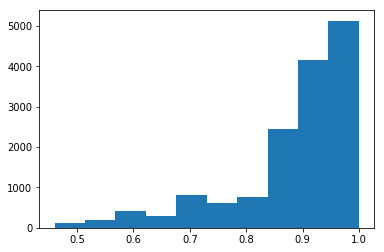

In [14]:
plt.figure()
plt.hist(Magnetization, bins=10)

In [15]:
# Ahora vamos a variar las temperaturas

def GetValues(T, B, Ntoys = 10000):
    
    sigma_ = sigma.copy()
    
    Energy = []
    Energy2 = []
    Magnetization = []
    
    for i in tqdm(range(Ntoys)):
   
        sigma_ = _ising_step(sigma_,T,B)

        if i >= 3000:
            energy = GetEnergy(sigma_, B)
            magnetization = GetMagnetization(sigma_)
            Energy.append(energy)
            Energy2.append(energy**2)
            Magnetization.append(magnetization)
            
    e = np.average(Energy)
    e2 = np.average(Energy2)
    m = np.average(Magnetization)

    cv = (e2 - e**2)/T**2   
    
    return e/float(M*N),m,cv/float(M*N)   

In [20]:
T = np.arange(2.0,3.0,0.1)

Energy = np.zeros(len(T))
Mag = np.zeros(len(T))
Cv = np.zeros(len(T))

for t in range(len(T)):
    Energy[t], Mag[t], Cv[t] = GetValues(T[t],0)
    print(T[t], Energy[t], abs(Mag[t]), Cv[t])

  3%|▎         | 258/10000 [00:00<00:03, 2573.36it/s]

(2.0, -1.7846742857142857, 0.9241742857142856, 0.48912234775510116)


  2%|▏         | 238/10000 [00:00<00:04, 2375.51it/s]

(2.1, -1.5318971428571428, 0.7913914285714285, 1.3269932165301586)


  2%|▏         | 248/10000 [00:00<00:03, 2476.65it/s]

(2.2, -1.4104057142857145, 0.6848457142857143, 1.6646105306122343)


  2%|▏         | 245/10000 [00:00<00:03, 2446.06it/s]

(2.3000000000000003, -1.4594628571428572, 0.7617428571428573, 0.8032178783225891)


  3%|▎         | 253/10000 [00:00<00:03, 2529.16it/s]

(2.4000000000000004, -1.42908, 0.7501228571428571, 1.0212194325396868)


  3%|▎         | 256/10000 [00:00<00:03, 2558.77it/s]

(2.5000000000000004, -1.2245771428571428, 0.50704, 1.1704990819265275)


  2%|▏         | 245/10000 [00:00<00:03, 2447.55it/s]

(2.6000000000000005, -0.9108514285714285, 0.06446571428571428, 0.4322192000966062)


  2%|▏         | 242/10000 [00:00<00:04, 2419.56it/s]

(2.7000000000000006, -1.0057314285714285, 0.3879714285714285, 0.7233871351865834)


  2%|▏         | 234/10000 [00:00<00:04, 2338.01it/s]

(2.8000000000000007, -1.0391599999999999, 0.4211828571428572, 0.6108160728862994)


100%|██████████| 10000/10000 [00:05<00:00, 1880.76it/s]

(2.900000000000001, -0.7914057142857144, 0.09792571428571427, 0.5534713228663626)


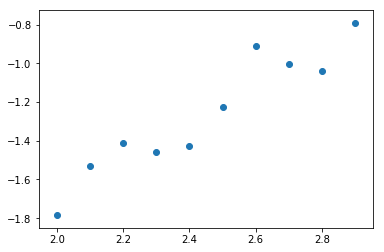

In [21]:
plt.figure()
plt.scatter(T,Energy)

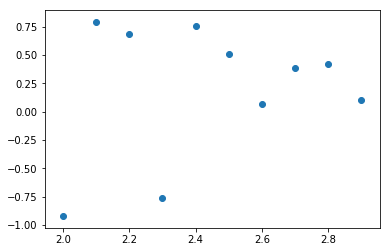

In [22]:
plt.figure()
plt.scatter(T,Mag)

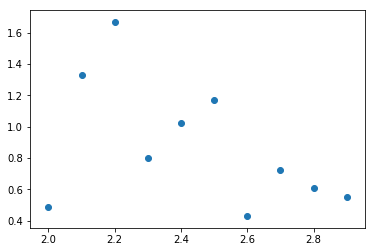

In [23]:
plt.figure()
plt.scatter(T,Cv)

# Ahora estudiemos el efecto del campo magnetico

In [32]:
T = 3.0

B = np.arange(-1.0,1.2,0.2)

Energy = np.zeros(len(B))
Mag = np.zeros(len(B))
Cv = np.zeros(len(B))

for b in range(len(B)):
    Energy[b], Mag[b], Cv[b] = GetValues(T,B[b])
    print(B[b], Energy[b], Mag[b])

  2%|▏         | 187/10000 [00:00<00:05, 1859.37it/s]

(-1.0, -1.7372442857142858, -0.7707628571428572)


  2%|▏         | 211/10000 [00:00<00:04, 2102.52it/s]

(-0.8, -1.635209142857145, -0.7556657142857143)


  2%|▏         | 215/10000 [00:00<00:04, 2149.96it/s]

(-0.6000000000000001, -1.376902857142857, -0.6673142857142859)


  2%|▏         | 197/10000 [00:00<00:05, 1956.73it/s]

(-0.40000000000000013, -1.1405017142857148, -0.5053942857142858)


  2%|▏         | 203/10000 [00:00<00:04, 2028.96it/s]

(-0.20000000000000018, -0.9754305714285708, -0.3969914285714286)


  2%|▏         | 203/10000 [00:00<00:04, 2019.20it/s]

(-2.220446049250313e-16, -0.7582057142857143, -0.11215714285714287)


  2%|▏         | 211/10000 [00:00<00:04, 2109.49it/s]

(0.19999999999999973, -0.8762208571428569, 0.32786571428571426)


  2%|▏         | 202/10000 [00:00<00:04, 2016.37it/s]

(0.3999999999999997, -1.0560794285714292, 0.41834)


  2%|▏         | 207/10000 [00:00<00:04, 2066.32it/s]

(0.5999999999999996, -1.464035714285714, 0.7237571428571429)


  2%|▏         | 197/10000 [00:00<00:05, 1960.18it/s]

(0.7999999999999996, -1.6040525714285738, 0.7484457142857143)


100%|██████████| 10000/10000 [00:07<00:00, 1402.68it/s]

(0.9999999999999996, -1.8105785714285714, 0.7979)


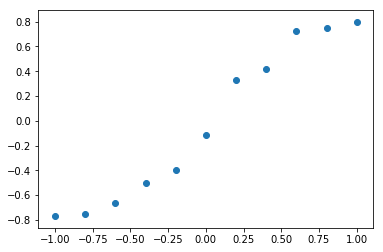

In [33]:
plt.figure()
plt.scatter(B,Mag)